<a href="https://colab.research.google.com/github/srkleon/DataScience/blob/main/MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
!unzip /content/MNIST_data.zip
!ls

Archive:  /content/MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               
MNIST_data.zip	sample_data  test.csv  train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.copy()
y = X.pop('label')

In [ ]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [ ]:
X = X/255

In [ ]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data Visualization

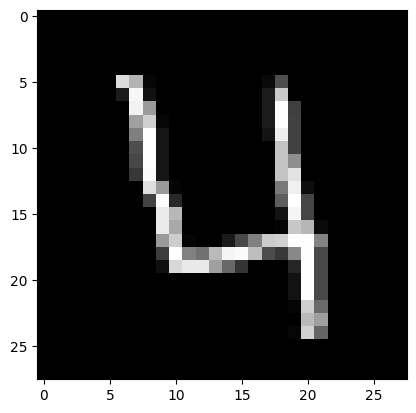

In [ ]:
img = X.iloc[3].values.reshape(28,28)
plt.imshow(img,cmap='gray')

Model Building

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(128,activation = 'relu',input_shape=(X.shape[-1],)),
        keras.layers.Dense(128,activation = 'relu'),
        keras.layers.Dense(128,activation = 'relu'),
        keras.layers.Dense(128,activation = 'relu'),
        keras.layers.Dense(10,activation = 'softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 151306 (591.04 KB)
Trainable params: 151306 (591.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile( optimizer ='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
model.fit(X_train,y_train,batch_size = 64 , epochs = 9 , validation_data = (X_val,y_val))

Epoch 1/9
591/591 [==============================] - 4s 5ms/step - loss: 0.3148 - accuracy: 0.9053 - val_loss: 0.1735 - val_accuracy: 0.9467
Epoch 2/9
591/591 [==============================] - 3s 6ms/step - loss: 0.1218 - accuracy: 0.9628 - val_loss: 0.1265 - val_accuracy: 0.9567
Epoch 3/9
591/591 [==============================] - 4s 6ms/step - loss: 0.0876 - accuracy: 0.9722 - val_loss: 0.1074 - val_accuracy: 0.9660
Epoch 4/9
591/591 [==============================] - 3s 5ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.1186 - val_accuracy: 0.9643
Epoch 5/9
591/591 [==============================] - 3s 5ms/step - loss: 0.0539 - accuracy: 0.9828 - val_loss: 0.0940 - val_accuracy: 0.9721
Epoch 6/9
591/591 [==============================] - 3s 6ms/step - loss: 0.0432 - accuracy: 0.9858 - val_loss: 0.1032 - val_accuracy: 0.9679
Epoch 7/9
591/591 [==============================] - 3s 6ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.1162 - val_accuracy: 0.9690
Epoch 8/9
591

In [ ]:
model.summary()
#test.head()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 151306 (591.04 KB)
Trainable params: 151306 (591.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pred_labels = model.predict(test)

875/875 [==============================] - 2s 3ms/step


In [ ]:
pred= pred_labels.argmax(axis=1)

In [ ]:
pred

array([2, 0, 9, ..., 3, 9, 2])

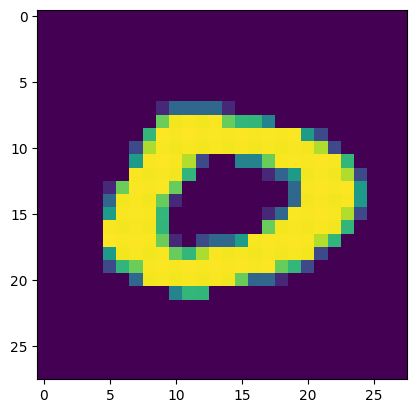

0

In [ ]:
img = test.iloc[766].values.reshape(28,28)
plt.imshow(img)
plt.show()

pred[766]